In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
df=pd.read_csv(r'D:\dataset\BTC-USD.csv')
print(df.shape)
df.head(5)

(366, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,7/14/2020,9238.703125,9283.841797,9171.661133,9243.213867,9243.213867,1.808504e+10
1,7/15/2020,9241.897461,9275.325195,9171.933594,9192.836914,9192.836914,1.584473e+10
2,7/16/2020,9191.980469,9214.312500,9088.947266,9132.227539,9132.227539,1.571397e+10
3,7/17/2020,9131.812500,9182.253906,9089.202148,9151.392578,9151.392578,1.394457e+10
4,7/18/2020,9151.183594,9230.983398,9100.824219,9159.040039,9159.040039,1.225260e+10


In [4]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
361,7/10/2021,33811.24219,34209.07031,33116.01172,33520.51953,33520.51953,2.297187e+10
362,7/11/2021,33509.07813,34584.70313,33346.73828,34240.18750,34240.18750,2.010873e+10
363,7/12/2021,34254.01563,34592.15625,32697.30859,33155.84766,33155.84766,2.432150e+10
364,7/13/2021,33125.46875,33327.10156,32261.41992,32702.02539,32702.02539,1.912086e+10
365,7/14/2021,32707.24023,32744.90625,31748.26953,32528.68945,32528.68945,2.209479e+10


In [5]:
df1=df.reset_index()['Close']
df1.shape

(366,)

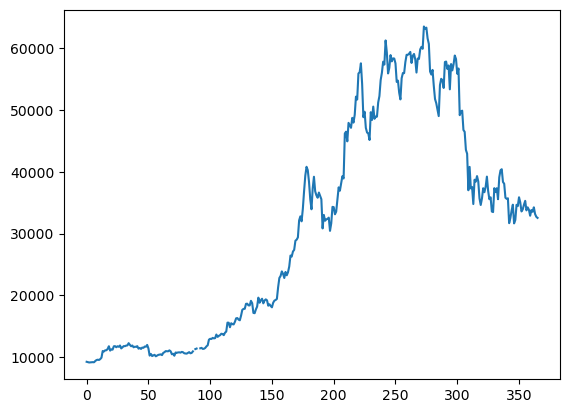

In [6]:
plt.plot(df1)

In [7]:
#MinMaxScaler is used to normalize the data
#change dataset into array
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(366, 1)

In [8]:
df1

array([[2.04126942e-03],
       [1.11473247e-03],
       [0.00000000e+00],
       [3.52484930e-04],
       [4.93137644e-04],
       [9.85628696e-04],
       [5.88618398e-04],
       [4.46302499e-03],
       [7.23058400e-03],
       [8.25518811e-03],
       [7.44263175e-03],
       [1.00215821e-02],
       [1.42159642e-02],
       [3.41843568e-02],
       [3.27488585e-02],
       [3.62000317e-02],
       [3.63976748e-02],
       [4.03014477e-02],
       [4.83227114e-02],
       [3.53382982e-02],
       [3.88830841e-02],
       [3.81390132e-02],
       [4.80915173e-02],
       [4.86938759e-02],
       [4.54145537e-02],
       [4.82206929e-02],
       [4.67804709e-02],
       [5.05025142e-02],
       [4.19026362e-02],
       [4.51103838e-02],
       [4.87741437e-02],
       [4.84933590e-02],
       [5.02742117e-02],
       [5.07727377e-02],
       [5.74232886e-02],
       [5.25830644e-02],
       [4.82986257e-02],
       [5.05073098e-02],
       [4.52493303e-02],
       [4.68924040e-02],


In [9]:
#train test split
training_size=int(len(df1)*.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]


In [10]:
train_data.shape

(237, 1)

In [11]:
test_data.shape

(129, 1)

In [12]:
import numpy
#convert array to dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [13]:
#reshape into x= t,t+1,t+2 ,t+3 and y=t+4
time_step=5
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [14]:
print(X_train)

[[2.04126942e-03 1.11473247e-03 0.00000000e+00 3.52484930e-04
  4.93137644e-04]
 [1.11473247e-03 0.00000000e+00 3.52484930e-04 4.93137644e-04
  9.85628696e-04]
 [0.00000000e+00 3.52484930e-04 4.93137644e-04 9.85628696e-04
  5.88618398e-04]
 ...
 [6.81541064e-01 6.62216807e-01 7.44861116e-01 7.21829561e-01
  7.61542732e-01]
 [6.62216807e-01 7.44861116e-01 7.21829561e-01 7.61542732e-01
  7.25180225e-01]
 [7.44861116e-01 7.21829561e-01 7.61542732e-01 7.25180225e-01
  7.31914241e-01]]


In [15]:
print(X_train.shape)

(231, 5)


In [16]:
print(y_train)

[9.85628696e-04 5.88618398e-04 4.46302499e-03 7.23058400e-03
 8.25518811e-03 7.44263175e-03 1.00215821e-02 1.42159642e-02
 3.41843568e-02 3.27488585e-02 3.62000317e-02 3.63976748e-02
 4.03014477e-02 4.83227114e-02 3.53382982e-02 3.88830841e-02
 3.81390132e-02 4.80915173e-02 4.86938759e-02 4.54145537e-02
 4.82206929e-02 4.67804709e-02 5.05025142e-02 4.19026362e-02
 4.51103838e-02 4.87741437e-02 4.84933590e-02 5.02742117e-02
 5.07727377e-02 5.74232886e-02 5.25830644e-02 4.82986257e-02
 5.05073098e-02 4.52493303e-02 4.68924040e-02 4.65801518e-02
 4.85986465e-02 4.10862004e-02 4.33342369e-02 4.03001724e-02
 4.43299238e-02 4.36745263e-02 4.74382931e-02 4.68739220e-02
 5.22013390e-02 4.19671702e-02 2.04716603e-02 2.53734549e-02
 1.90788373e-02 2.11163888e-02 2.27571816e-02 1.83790043e-02
 2.04174180e-02 2.26390159e-02 2.33338020e-02 2.40925830e-02
 2.19146841e-02 2.84821654e-02 3.06177301e-02 3.38906762e-02
 3.34140447e-02 3.33330406e-02 3.60874521e-02 3.32169046e-02
 2.44620591e-02 2.586353

In [17]:
print(y_train.shape)

(231,)


In [18]:
#reshape input to sample,time step ,feature
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [19]:
X_train


array([[[2.04126942e-03],
        [1.11473247e-03],
        [0.00000000e+00],
        [3.52484930e-04],
        [4.93137644e-04]],

       [[1.11473247e-03],
        [0.00000000e+00],
        [3.52484930e-04],
        [4.93137644e-04],
        [9.85628696e-04]],

       [[0.00000000e+00],
        [3.52484930e-04],
        [4.93137644e-04],
        [9.85628696e-04],
        [5.88618398e-04]],

       ...,

       [[6.81541064e-01],
        [6.62216807e-01],
        [7.44861116e-01],
        [7.21829561e-01],
        [7.61542732e-01]],

       [[6.62216807e-01],
        [7.44861116e-01],
        [7.21829561e-01],
        [7.61542732e-01],
        [7.25180225e-01]],

       [[7.44861116e-01],
        [7.21829561e-01],
        [7.61542732e-01],
        [7.25180225e-01],
        [7.31914241e-01]]])

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
4/4 [==============================] - 14s 752ms/step - loss: nan - val_loss: nan
Epoch 2/20
4/4 [==============================] - 0s 45ms/step - loss: nan - val_loss: nan
Epoch 3/20
4/4 [==============================] - 0s 42ms/step - loss: nan - val_loss: nan
Epoch 4/20
4/4 [==============================] - 0s 36ms/step - loss: nan - val_loss: nan
Epoch 5/20
4/4 [==============================] - 0s 35ms/step - loss: nan - val_loss: nan
Epoch 6/20
4/4 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 7/20
4/4 [==============================] - 0s 42ms/step - loss: nan - val_loss: nan
Epoch 8/20
4/4 [==============================] - 0s 46ms/step - loss: nan - val_loss: nan
Epoch 9/20
4/4 [==============================] - 0s 43ms/step - loss: nan - val_loss: nan
Epoch 10/20
4/4 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 11/20
4/4 [==============================] - 0s 44ms/step - loss: nan - val_loss:

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
#math.sqrt(mean_squared_error(y_train,train_predict))

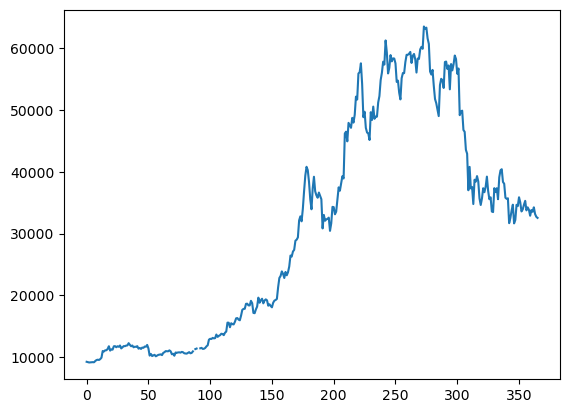

In [26]:
#plotting
look_back=5
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test pediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot base line and predict
plt.plot(scaler.inverse_transform(df1))

plt.plot(trainPredictPlot)
plt.show()
